# Анализ продаж компьютерных  игр(интернет-магазин «Стримчик»)

  **Исходные данные:**
Интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры.
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы ( games.csv.). Данные представлены до 2016 года.



  **Цель исследования:**
выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Сформировать портрет пользователя каждого региона.

  
  
  
  **Ход исследования:**
  
  1. Обзор данных
  2. Предобработка данных
  3. Исследовательский анализ данных
  4. Портрет пользователя каждого региона
  5. Общий вывод

  

## Обзор данных

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
# Отображение числовых данных в читаемом виде
pd.options.display.float_format = '{:.2f}'.format


In [2]:
# открываем файл
try:
    data = pd.read_csv('games.csv', sep = ',')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv', sep = ',')

In [3]:
# выведем первые 10 строк на экран
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.00,Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,2006.00,Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.00,Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# Получим данные о размере таблицы
data.shape
# В таблице 16715 строк и 11 столбцов

(16715, 11)

In [5]:
# Изучим общую информацию о полученном датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
# Получим более детальную характеристику датафрейма
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.00,2006.48,5.88,1980.00,2003.00,2007.00,2010.00,2016.00
NA_sales,16715.00,0.26,0.81,0.00,0.00,0.08,0.24,41.36
EU_sales,16715.00,0.15,0.50,0.00,0.00,0.02,0.11,28.96
JP_sales,16715.00,0.08,0.31,0.00,0.00,0.00,0.04,10.22
Other_sales,16715.00,0.05,0.19,0.00,0.00,0.01,0.03,10.57
Critic_Score,8137.00,68.97,13.94,13.00,60.00,71.00,79.00,98.00


In [7]:
# Проверим явные дубликаты и выведем их сумму
data.duplicated().sum()

0

In [8]:
#Посмотрим какие столбцы  имеются в таблице
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

**Вывод**
1. Открыли файл (в файле 16715 строк и 11 столбцов);
2. Имеются пропуски в столбцах: Critic_Score, User_Score, Rating и Year_of_Release, Name,  Genre; 
3. Явные дубликаты в данных отсутствуют;
4. Необходимо поменять тип данных в столбце Critic_Score  и в Year_of_Release на int, User_Score на float;
5. Необходимо привести наименование столбцов таблицы к нижнему регистру.



## Предобработка данных

### Замена  названия столбцов (приведение к нижнему регистру)

In [9]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразование типов данных

Для дальнейшего анализа необходимо осуществить изменение типа данных в следующих столбцах:

- year_of_release в целочисленное значение (int64), т.к. указанный столбец по определению не может быть дробным числом;
- critic_score на int64, так как в столбце отсутствуют дробные значения.



In [10]:
# Преобразование типов данных (столбец year_of_release)
data['year_of_release'] = data['year_of_release'].astype('Int64')



In [11]:
# Преобразование типов данных (столбец user_score)
data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [12]:
data['critic_score'] = data['critic_score'].astype('Int64')

In [13]:
# Проверим, что преобразование прошло корректно
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(4), object(5)
memory usage: 1.4+ MB


### Обработка пропусков

In [14]:
# Определим, в каких столбцах есть пропуски
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [15]:
# Проанализируем долю пропусков в столбцах
missing_value_data = pd.DataFrame(round(data.isna().sum()*100 / len(data),2))
missing_value_data['count_missing'] = data.isna().sum()
missing_value_data.columns =['percent_missing', 'count_missing']
missing_value_data

,percent_missing,count_missing
name,0.01,2
platform,0.00,0
year_of_release,1.61,269
genre,0.01,2
na_sales,0.00,0
eu_sales,0.00,0
jp_sales,0.00,0
other_sales,0.00,0
critic_score,51.32,8578
user_score,40.09,6701


In [16]:

# Сформируем диаграмму, отображающую пропуски по столбцам

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6),rot = -1,  legend = False, fontsize = 16,grid = True)
            .set_title('Пропуски в данных', fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

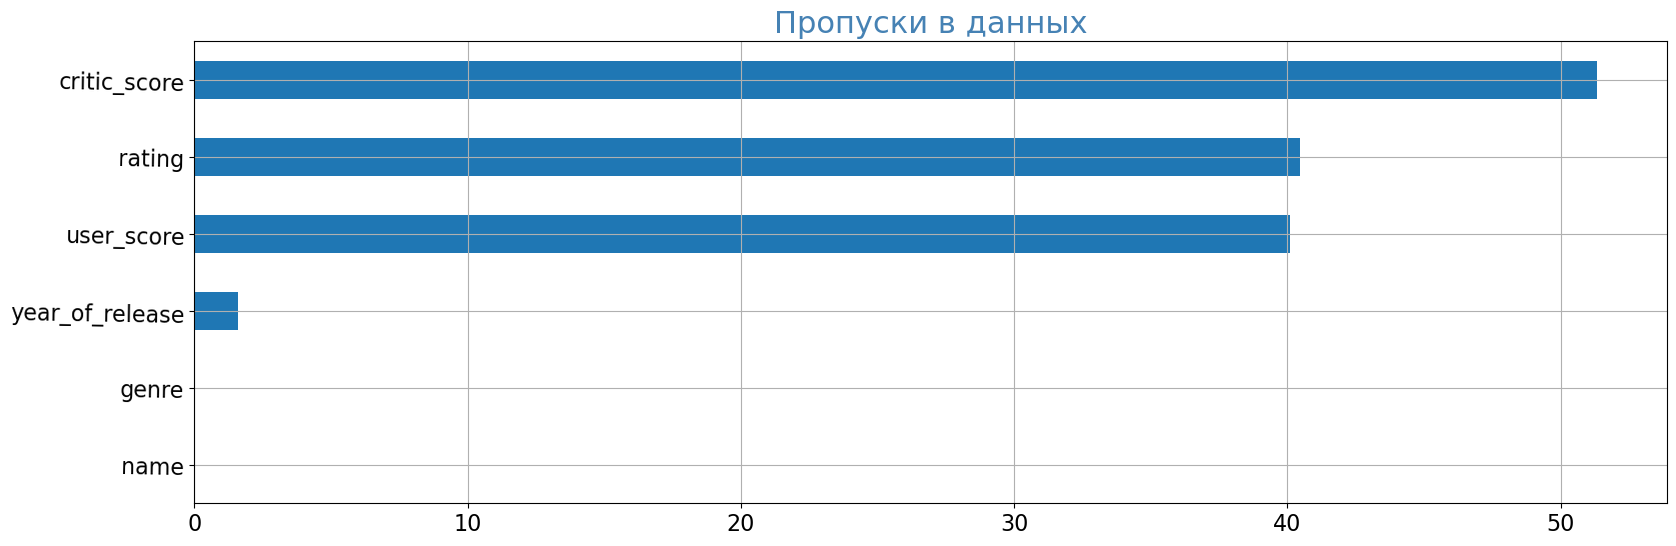

In [17]:
pass_value_barh(data)

In [18]:
# Выведем 2 строки в столбце name c пропусками
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


In [19]:
# 0.01% - крайне маленькое значение. удалим эти строки
data_new = data.dropna(subset = ['name'])
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(4), object(5)
memory usage: 1.6+ MB


In [20]:
# В столбце year_of_release 269 пропусков. Попробуем заполнить их там, где название игры в стобце Name 
# совпадают на самый ранний год релиза
data_new['year_of_release'] = data_new['year_of_release'].fillna(data_new.groupby('name')['year_of_release'].transform('min'))



In [21]:
data_new['year_of_release'].isna().sum()

146

In [22]:
# Найдем % оставшихся пропусков от всего датасета
round(data_new['year_of_release'].isna().sum()/len(data_new['year_of_release'])*100,2)

0.87

In [23]:
# После заполнения пропусков в столбце year_of_release осталось 146 строк с пропусками. Это менее 1% от всего датасета.
# предлагаю их удалить
data_new = data_new.dropna(subset = ['year_of_release'])
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   Int64  
 9   user_score       9934 non-null   object 
 10  rating           9868 non-null   object 
dtypes: Int64(2), float64(4), object(5)
memory usage: 1.5+ MB


Большое количество пропусков имеется в столбцах critic_score (51%), user_score (40%) и rating (40%).
Данные пропуски могли появится по нескольким причинам:
- технический сбой;
- игры не оценивались критиками/ пользователями;
- пользователь не смог оценить игру и оставил пропуск.
Заполнять медианой или средним данные в столбцах critic_score и user_score не совсем корректно, так как э то может привести к искажению результатов. Предлагаю оставить эти пропуски как есть.
Для обработки пропусков в столбце rating более детально рассмотрим данные.



In [24]:
# Посмотрим уникальные значения в столбце rating
data_new['rating'].value_counts()

E       3958
T       2930
M       1554
E10+    1412
EC         8
K-A        3
RP         2
AO         1
Name: rating, dtype: int64

In [25]:
data_new['genre'].value_counts()

Action          3342
Sports          2333
Misc            1735
Role-Playing    1484
Shooter         1311
Adventure       1294
Racing          1236
Platform         879
Simulation       860
Fighting         842
Strategy         678
Puzzle           573
Name: genre, dtype: int64

In [26]:
data_new.groupby('genre')['rating'].value_counts()

genre         rating
Action        T          675
              M          604
              E10+       481
              E          414
              AO           1
              EC           1
Adventure     E          159
              T          115
              M           98
              E10+        67
              EC           2
Fighting      T          360
              M           49
              E10+        19
              E            8
Misc          E          453
              T          233
              E10+       166
              M           13
              EC           5
              K-A          1
Platform      E          354
              E10+       142
              T           63
              M            3
Puzzle        E          288
              E10+        42
              T           10
Racing        E          581
              T          169
              E10+        96
              M           18
              RP           1
Role-Playing  T       

In [27]:
# Как видно из представленных данных, у разных жанров могут быть разные рейтинги ESRB. 
# Заменим пропуски в столбце rating на 'No ESRB'
data_new['rating'] = data_new['rating'].fillna('No ESRB')

In [28]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   Int64  
 9   user_score       9934 non-null   object 
 10  rating           16567 non-null  object 
dtypes: Int64(2), float64(4), object(5)
memory usage: 1.5+ MB


### Аббревиатура 'tbd' в столбце с оценкой пользователей

In [29]:
data_new['user_score'].value_counts()

tbd    2394
7.8     324
8       288
8.2     279
8.3     253
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

В столбце user_score 2376 строк с аббревиатурой tbd. Согласно определению в интернете: *TBD (To Be Determined) – термин из области компьютерных игр, который означает, что рейтинг игрока будет определен позже. Это может произойти, если игрок только начал играть или играет в новом режиме или соперничает с новыми игроками.* Получается, что  рейтинг еще не определен и будет выставлен позже. Предлагаю заменить данные значения на Nan, а тип данных в столбце заменить на float.

In [30]:
# Заменим строки с аббревиатурой tbd на Nan
data_new['user_score'] = data_new['user_score'].replace('tbd', 'NaN')

In [31]:
data_new['user_score'].value_counts()

NaN    2394
7.8     324
8       288
8.2     279
8.3     253
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [32]:
data_new['user_score'] = pd.to_numeric(data['user_score'],errors='coerce')

In [33]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   Int64  
 9   user_score       7540 non-null   float64
 10  rating           16567 non-null  object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.5+ MB


### Суммарные продажи во всех регионах

In [34]:
# Добавляю в таблицу столбец с суммарными продажами
data_new['total_sales'] = data_new['na_sales'] + data_new['eu_sales'] + data_new['jp_sales']

In [35]:
data_new.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.00,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,No ESRB,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.30,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.00,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,No ESRB,30.38


**Вывод**
Была проведена предобработка данных, в результате которой:
- Названия столбцов были приведены к нижнему регистру;
- Были изменены типы данных в столбцах year_of_release  и critic_score на целочисленное значение (int64);
- Были обработаны пропуски в столбцах. По результатам обработки:
1) были удалены строки с пропусками в столбцах name и year_of_release
2) пропуски в столбцах critic_score и user_score оставлены без изменений
3) пропуски в столбце rating заменены на 'No ESRB'
- Проанализирована аббревиатура 'tbd' в столбце с оценкой пользователей. tbd заменено на NaN;
- Добавлен столбец с суммарными продажами по регионам для каждой игры.


## Исследовательский анализ данных

### Сколько игр выпускалось в разные годы

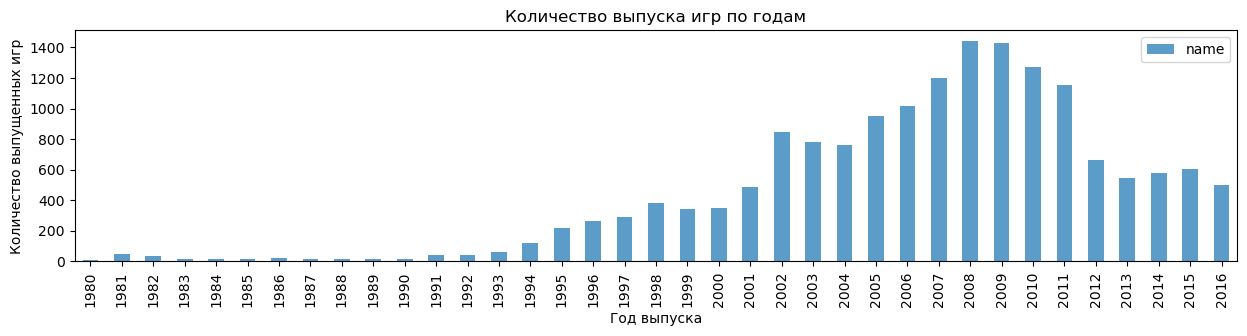

In [36]:
games_on_period = data_new.pivot_table(index= 'year_of_release', values = 'name', aggfunc = 'count')
games_on_period.plot( kind = 'bar', figsize = (15,3),legend=True, alpha = 0.73)
plt.title('Количество выпуска игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр')
plt.show()

Как видно из графика, количество выпусков новых игр начало увеличиваться с 1990 г и до 2008 г, на который пришелся пик. 
Начиная с 2009 г наблюдается спад,связанный, скорее всего, с созданием мобильных приложений.
Для нашей задачи будем ориентироваться на  данные с 2000 г.

### Как менялись продажи по платформам. Платформы с наибольшими суммарными продажами. Характерный срок, когда  появляются новые и исчезают старые платформы.

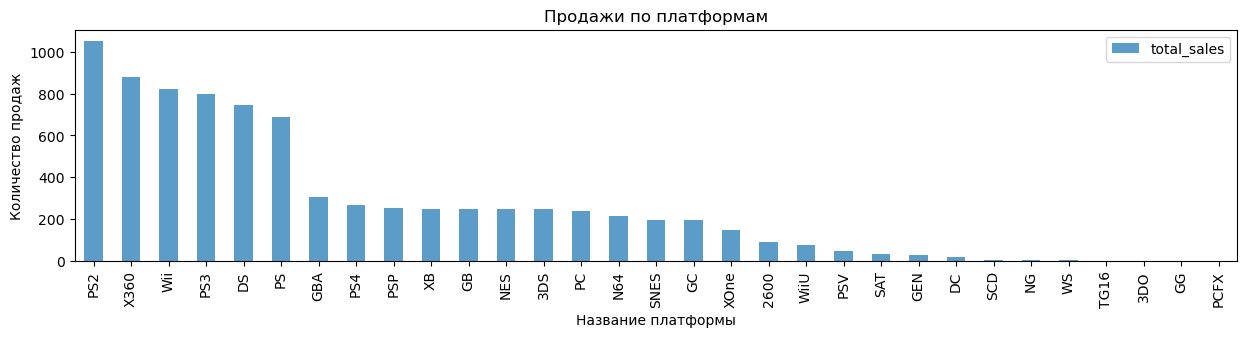

In [37]:
games_on_platform = (
    data_new
    .pivot_table(index= 'platform', values = 'total_sales', aggfunc = 'sum')
    .sort_values(by = 'total_sales',ascending = False)
)
games_on_platform.plot( kind = 'bar', figsize = (15,3),legend=True, alpha = 0.73)
plt.title('Продажи по платформам')
plt.xlabel('Название платформы')
plt.ylabel('Количество продаж')
plt.show()

Из графика видно, что самые популярные - это 6 платформ: PS2, X360, Wii, PS3, DS и PS.

In [38]:
round(data_new.query('platform in ["PS2", "X360", "Wii", "PS3", "DS", "PS" ]')['total_sales'].sum()
      /data_new['total_sales'].sum(),2)*100


62.0

На топ-6 платформ приходится 62% продаж.

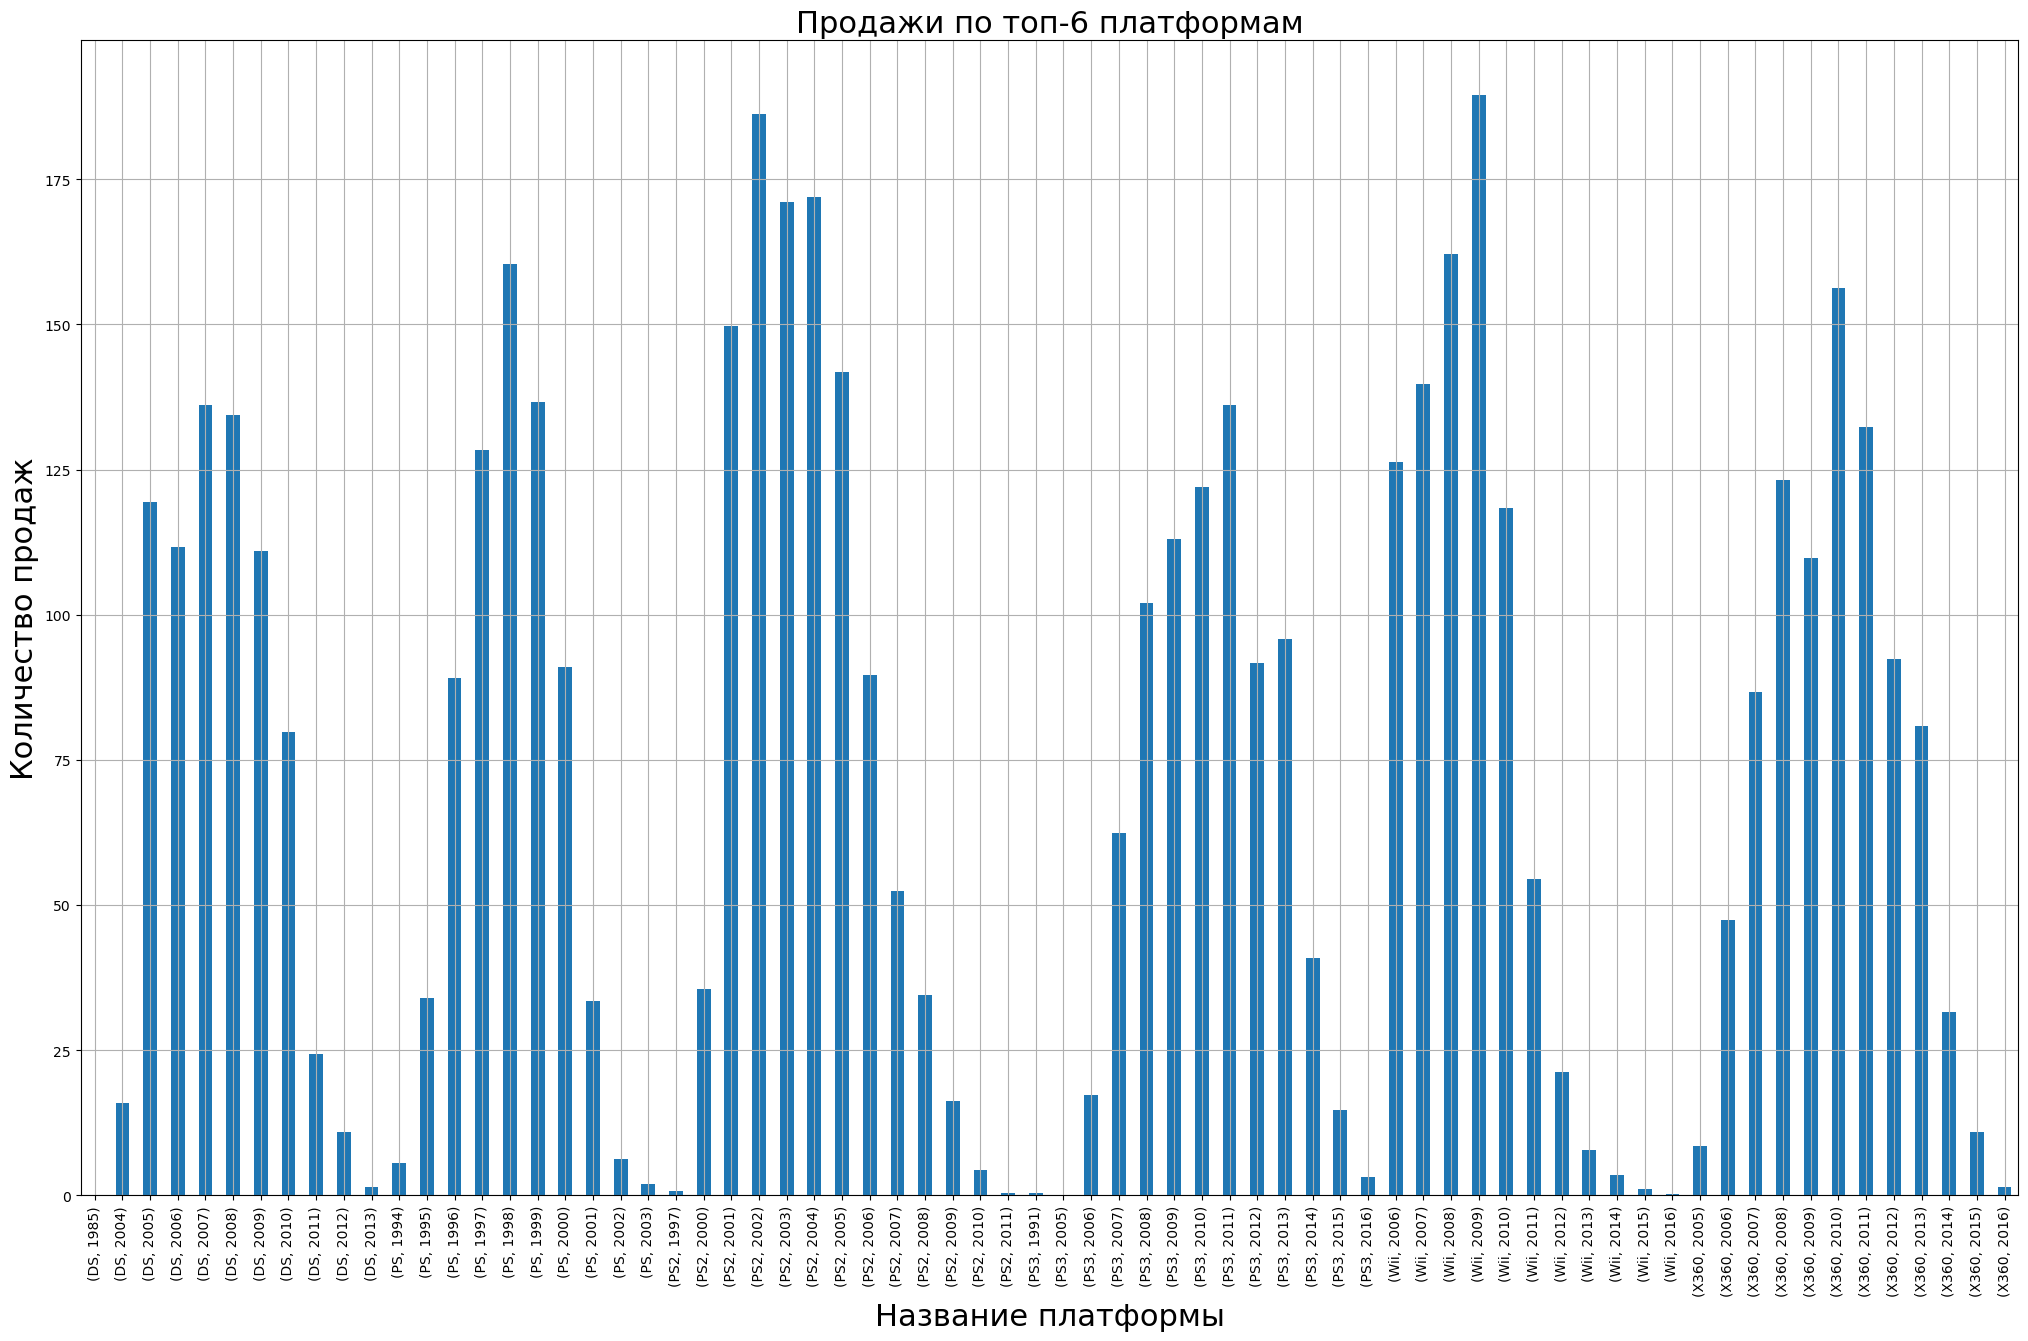

In [39]:
# Построим график по топ-6 платформам с распределением по годам 
(
    data_new
    .pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
    .query('platform in ["PS2", "X360", "Wii", "PS3", "DS", "PS"]')
    .plot(y='total_sales',
         kind='bar',
         legend = False,
         figsize=(25,15),
         grid=True)
);        
plt.title('Продажи по топ-6 платформам',fontsize = 22)
plt.xlabel('Название платформы', fontsize = 22)
plt.ylabel('Количество продаж',fontsize = 22)
plt.show()    


    Средний жизненный цикл платформы - около 10 лет.

### Определение актуального периода.

Так как мы прогнозируем данные на 2017 год, актуальный период для прогноза - предыдущие 3 года, т.е. 2014 - 2016 гг.

In [40]:
actual_period = data_new[data_new['year_of_release'] >= 2014]
actual_period.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   Int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    Int64  
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 174.8+ KB


In [41]:
actual_period.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,No ESRB,12.25
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.30,M,10.65
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,No ESRB,10.94
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.30,E,7.30
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,No ESRB,6.70


In [42]:
# Посмотрим, какие платформы попали в анализируемый период
actual_period['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

Для целей прогнозирования на 2017 год будем использовать данные по 10 платформам: 'PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV','PSP'.

#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ

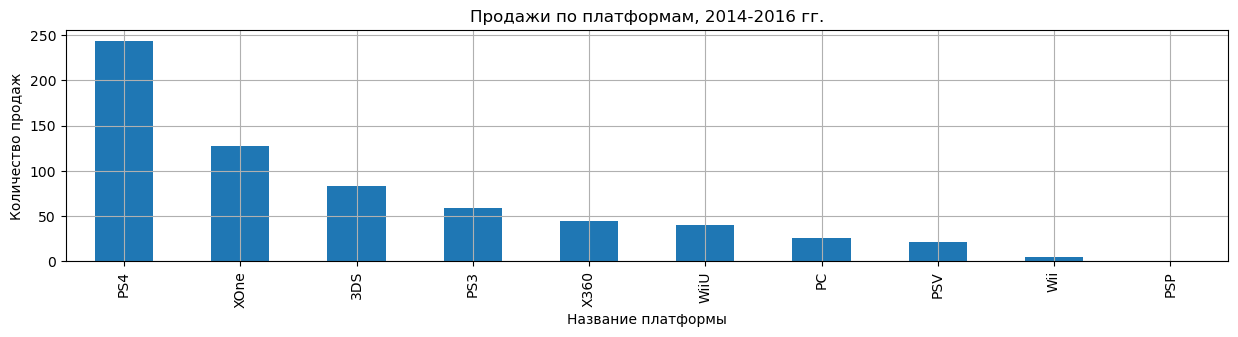

In [43]:
(
    actual_period
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by = 'total_sales',ascending = False)
    .plot(y='total_sales',kind='bar',legend = False,figsize=(15,3),grid=True)
)
      
plt.title('Продажи по платформам, 2014-2016 гг.')
plt.xlabel('Название платформы')
plt.ylabel('Количество продаж')
plt.show()    


Наиболее перспективные платформы:PS4, XOne и 3DS.

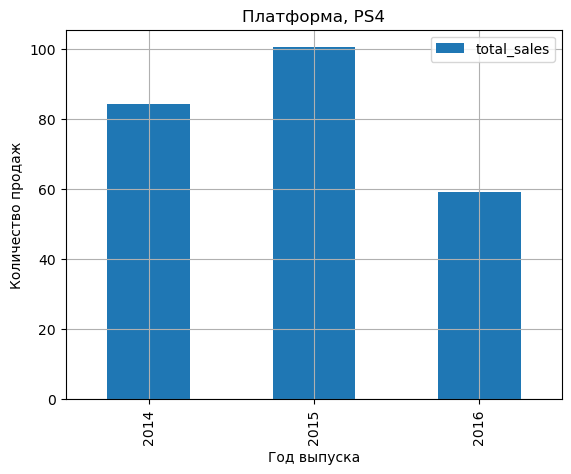

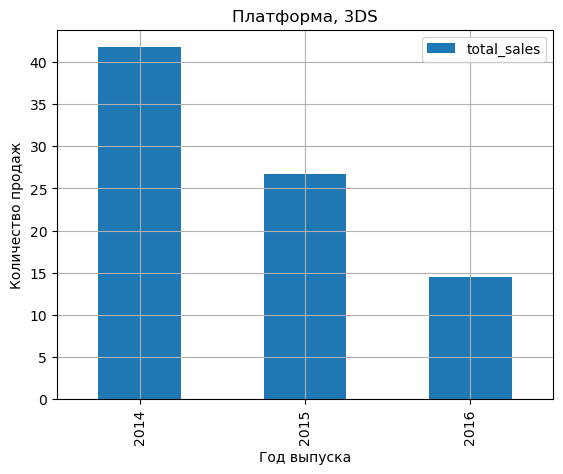

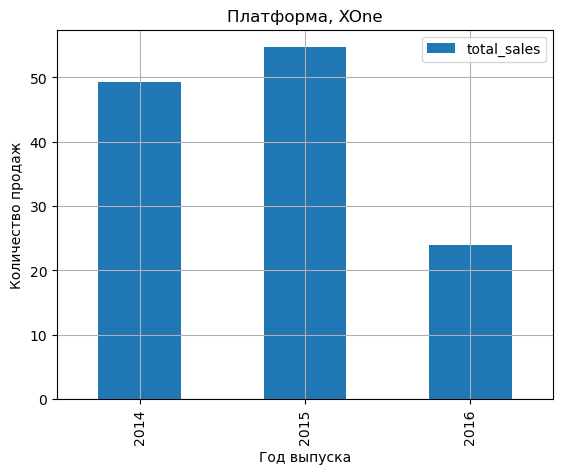

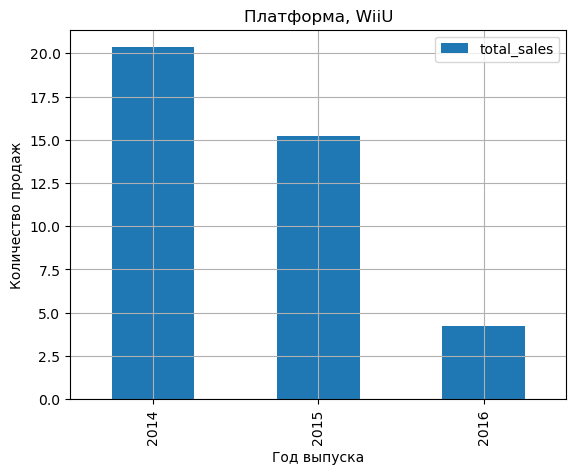

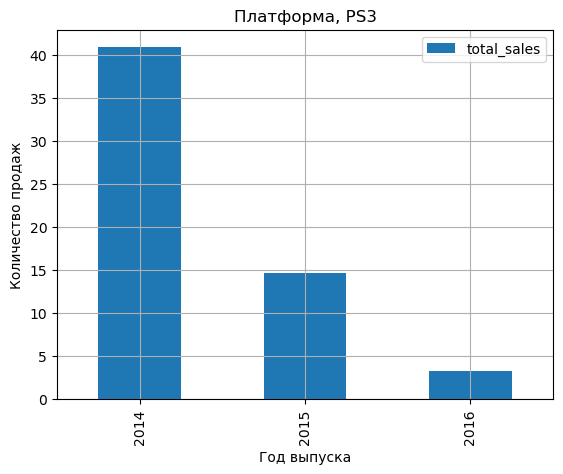

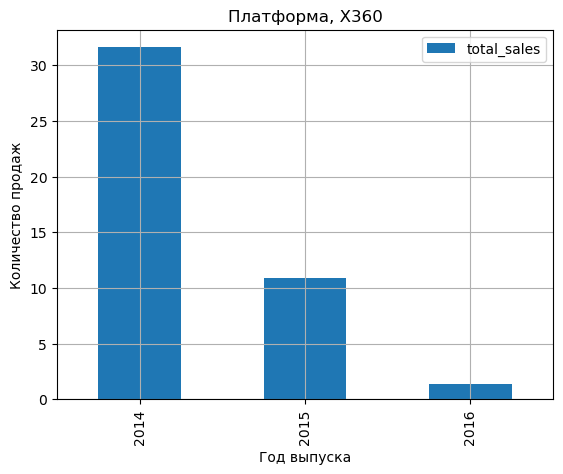

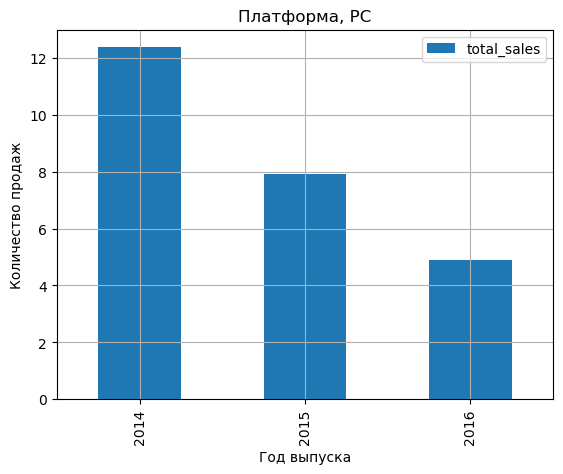

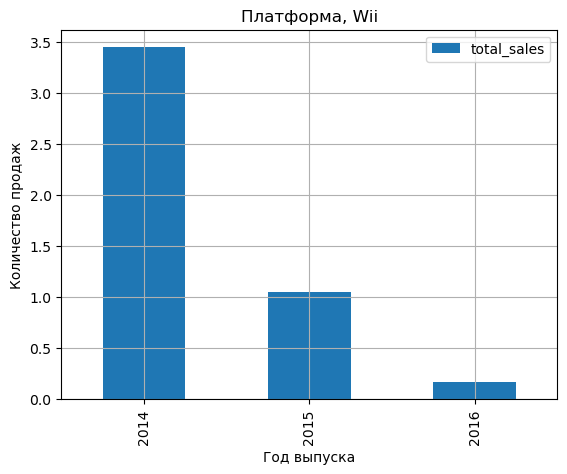

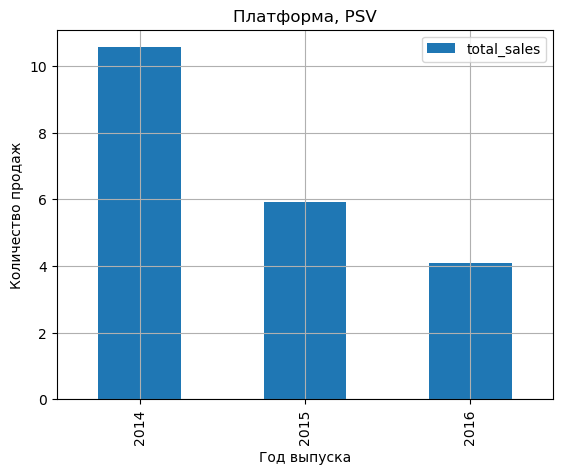

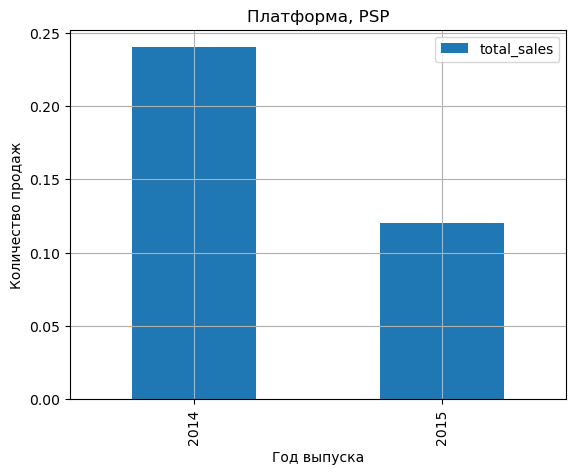

In [44]:
# Посмотрим продажи по каждой платформе отдельно. 
# Напишем функцию, выводящую сразу данные по всем платформам, попавшим в актуальный период
actual_platform = actual_period['platform'].unique()
for i in actual_platform:
    (actual_period
     .query('platform == @i')
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .plot(kind='bar',grid = True)
    )
    plt.title(f'Платформа, {i}')
    plt.xlabel('Год выпуска')
    plt.ylabel('Количество продаж')
    plt.show()    

По всем платформам наблюдается уменьшение продаж в 2016 г., так как по условиям проекта данные за 2016 год неполные.
Объем продаж на  платформе 3DS в 2015 г. ниже, чем в 2014 г,- исключим ее из списка перспективных платформ.
Таким образом, перспективные платформы:PS4, XOne.

### График «ящик с усами» по глобальным продажам игр в разбивке по платформам

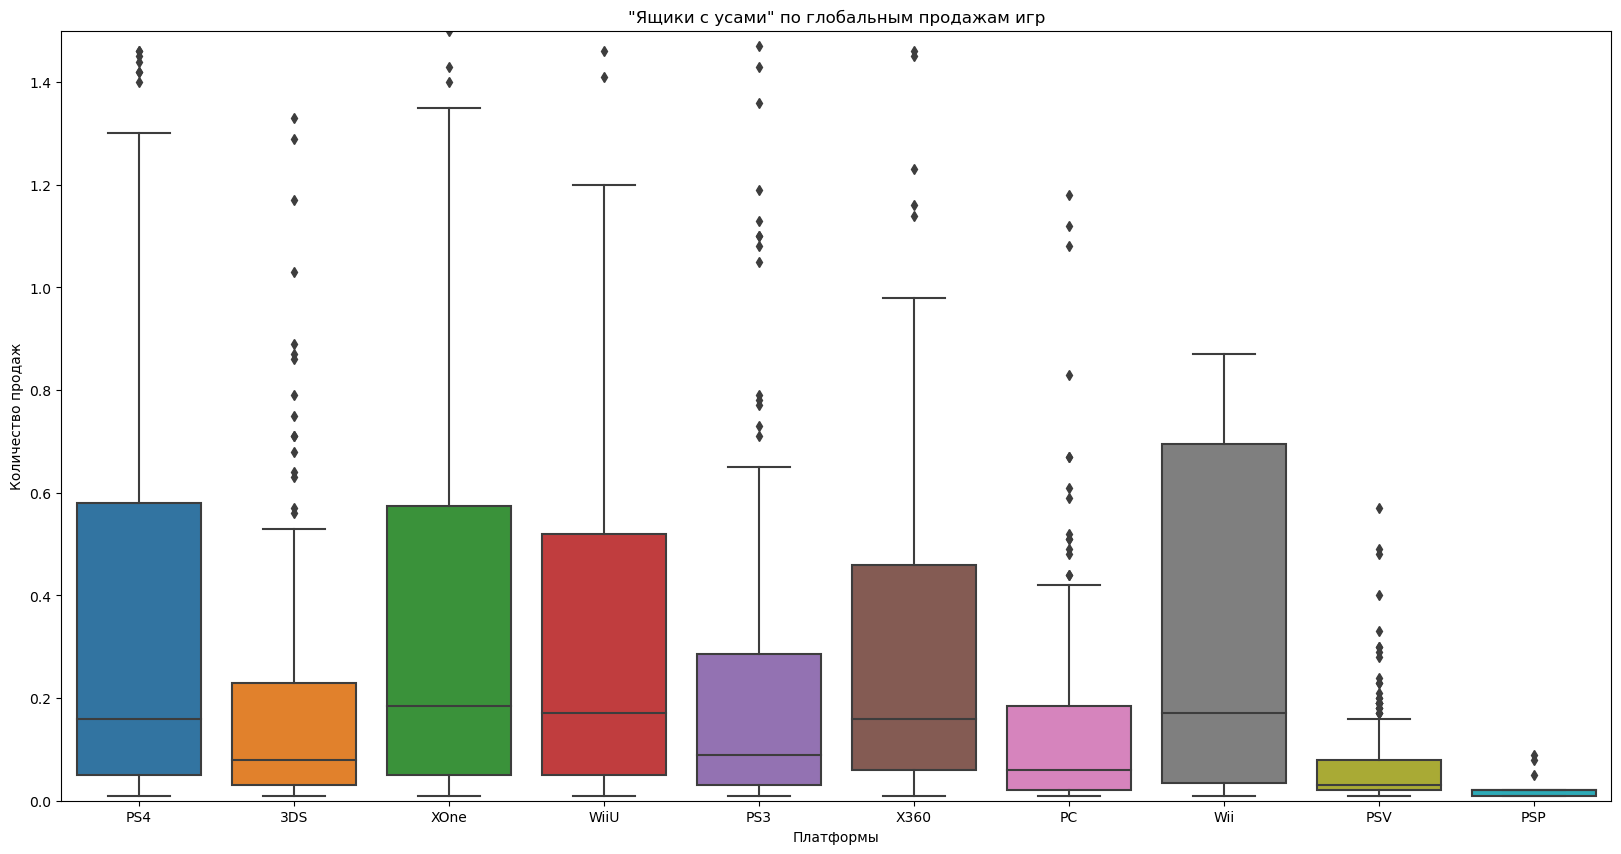

In [45]:
plt.figure(figsize=(20, 10))

sns.boxplot(data=actual_period, x='platform', y='total_sales')

plt.ylim(0, 1.5)

plt.title('"Ящики с усами" по глобальным продажам игр')
plt.xlabel('Платформы')
plt.ylabel('Количество продаж')

plt.show()

In [46]:
# Посмотрим в цифрах
actual_period.groupby('platform')['total_sales'].describe().T

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,212.00,151.00,219.00,376.00,13.00,295.00,11.00,73.00,111.00,228.00
mean,0.39,0.17,0.27,0.65,0.03,0.07,0.42,0.55,0.40,0.56
std,1.12,0.30,0.53,1.36,0.03,0.12,0.57,1.08,0.57,0.95
min,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
25%,0.03,0.02,0.03,0.05,0.01,0.02,0.04,0.05,0.06,0.05
50%,0.08,0.06,0.09,0.16,0.02,0.03,0.17,0.17,0.16,0.18
75%,0.23,0.18,0.29,0.58,0.02,0.08,0.70,0.52,0.46,0.58
max,10.94,2.82,4.40,12.25,0.09,1.72,1.84,6.58,3.88,6.71


По диаграмме размаха («ящик с усами») наибольшее количество продаж зафиксировано на платформе WiiU. Однако, если мы посмотрим на график выше с продажами по годам, то увидим, что на платформе наблюдается снижение количества продаж, начиная с 2015 года. Очевидно, что жизненный цикл платформы идет на убыль.
Далее по количеству продаж лидируют платформы PS4, XOne, которые ранее мы отнесли к перспективным.
Медиана продаж по всем платформам не превышает 0,2 млн.шт.

### Как влияют на продажи  XOne отзывы пользователей и критиков.

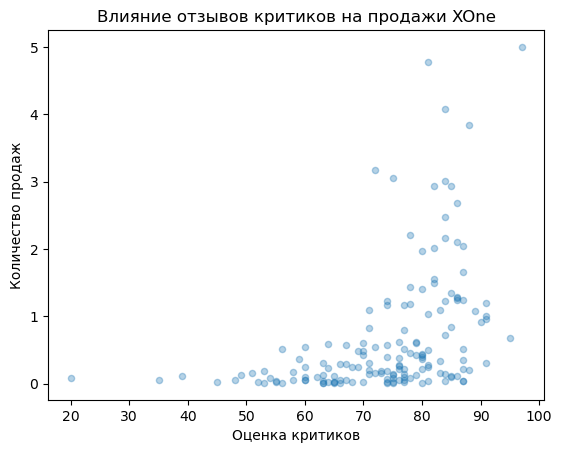

In [47]:
# Построим диаграмму рассеяния для отражения связи между отзывами критиков и продажами XOne
actual_period.query('platform == "XOne"').plot(x='critic_score', y='total_sales',kind ='scatter',alpha = 0.33)

plt.title('Влияние отзывов критиков на продажи XOne')
plt.xlabel('Оценка критиков')
plt.ylabel('Количество продаж')
plt.show()

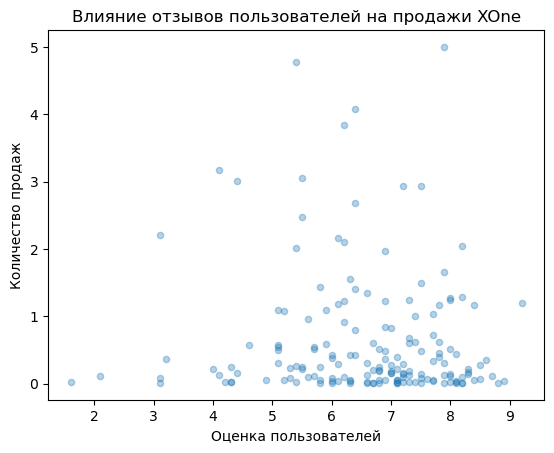

In [48]:
# Построим диаграмму рассеяния для отражения связи между отзывами пользователей и продажами XOne
actual_period.query('platform == "XOne"').plot(x='user_score', y='total_sales',kind ='scatter',alpha = 0.33)

plt.title('Влияние отзывов пользователей на продажи XOne')
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество продаж')
plt.show()

In [49]:
display('Коэффициент корреляции Пирсона между продажами и отзывами критиков:', 
        actual_period
        .query('platform == "XOne"')[['total_sales','critic_score']]
        .corr()
       )

'Коэффициент корреляции Пирсона между продажами и отзывами критиков:'

,total_sales,critic_score
total_sales,1.00,0.43
critic_score,0.43,1.00


In [50]:
display('Коэффициент корреляции Пирсона между продажами и отзывами пользователей:', 
        actual_period
        .query('platform == "XOne"')[['total_sales','user_score']]
        .corr()
       )

'Коэффициент корреляции Пирсона между продажами и отзывами пользователей:'

,total_sales,user_score
total_sales,1.00,-0.07
user_score,-0.07,1.00


Между продажами и отзывами критиков имеется слабая связь(0.43), а между продажами и отзывами пользователей корреляция отсутствует (-0.07).

### Как влияют на продажи  игр на других платформах отзывы пользователей и критиков.

In [51]:
display('Коэффициент корреляции Пирсона между продажами на других платформах и отзывами критиков на других платформах:', 
        actual_period
        .query('platform != "XOne"')[['total_sales','critic_score']]
        .corr()
       )

'Коэффициент корреляции Пирсона между продажами на других платформах и отзывами критиков на других платформах:'

,total_sales,critic_score
total_sales,1.00,0.30
critic_score,0.30,1.00


In [52]:
display('Коэффициент корреляции Пирсона между продажами на других платформах и отзывами пользователей:', 
        actual_period
        .query('platform != "XOne"')[['total_sales','user_score']]
        .corr()
       )

'Коэффициент корреляции Пирсона между продажами на других платформах и отзывами пользователей:'

,total_sales,user_score
total_sales,1.00,0.00
user_score,0.00,1.00


Между продажами на других платформах и отзывами критиков идентичные показатели по корреляции:
имеется слабая связь(0.3), а между продажами и отзывами пользователей корреляция отсутствует (0.00).

### Общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [53]:
# Общее распределение игр по жанрам
actual_period.groupby('genre')['genre'].count().sort_values(ascending = False)

genre
Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: genre, dtype: int64

Топ - 3 жанров по количеству игр: Action,  Role-Playing и Adventure. 
Жанры с наименьшим количеством игр (менее 50): Simulation, Platform , Strategy и Puzzle.


In [54]:
# Выведем данные по продажам по жанрам
(
    actual_period
    .pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum')
    .sort_values(by = 'total_sales',ascending = False)
)

,total_sales
genre,
Action,176.79
Shooter,149.41
Sports,95.12
Role-Playing,92.80
Misc,33.52
Fighting,25.49
Racing,24.63
Platform,16.28
Adventure,15.73


Топ - 3 жанров по количеству продаж: Action,  Shooter и Sports.   
Жанры с наименьшим объемом продаж:Simulation, Strategy и Puzzle.


In [55]:
# Выведем цифровые данные по жанрам по значениям, отсортированную по медианному значению
actual_period.groupby('genre')['total_sales'].describe().sort_values(by = '50%',ascending = False)

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Shooter,128.00,1.17,1.76,0.01,0.15,0.47,1.38,12.25
Sports,161.00,0.59,1.06,0.01,0.05,0.17,0.58,7.30
Fighting,60.00,0.42,1.10,0.01,0.06,0.11,0.29,7.07
Platform,38.00,0.43,0.66,0.01,0.06,0.11,0.43,3.01
Role-Playing,221.00,0.42,1.08,0.01,0.05,0.10,0.33,10.94
Simulation,44.00,0.28,0.61,0.01,0.02,0.10,0.29,2.93
Misc,113.00,0.30,0.63,0.01,0.03,0.09,0.29,4.40
Action,619.00,0.29,0.69,0.01,0.03,0.08,0.25,10.65
Racing,69.00,0.36,0.88,0.01,0.03,0.08,0.23,6.58


Анализ по медианному значению и среднему дал несколько другие результаты:
- Жанры с наибольшим медианным значением и средним: Shooter и Sports;
- Action, который был в лидерах по количеству игр и   количеству продаж характеризуется низкой медианой и средним значением;
- Fighting и Platform, имеющие мало игр, показывают хорошие медианные продажи;
- Жанр Adventure, который замыкал топ- 3 по количеству игр, имеет самые низкие медианные продажи.



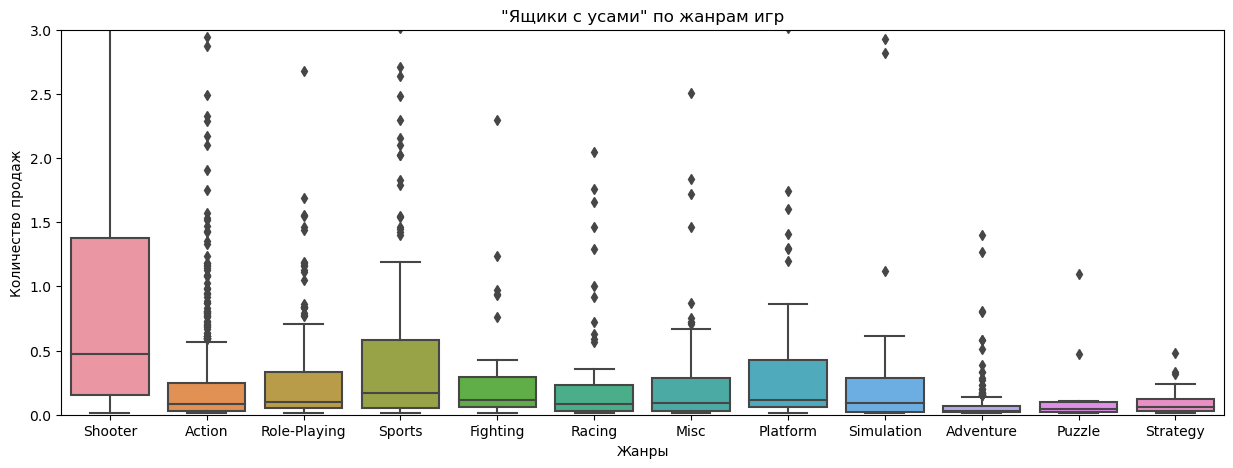

In [56]:
# Визуализируем данные в диаграмме размаха или «ящике с усами»
plt.figure(figsize=(15, 5))

sns.boxplot(data=actual_period, x='genre', y='total_sales')

plt.ylim(0, 3)

plt.title('"Ящики с усами" по жанрам игр')
plt.xlabel('Жанры')
plt.ylabel('Количество продаж')

plt.show()

**Вывод**
В результате исследовательского анализа данных можно сформулировать следующие выводы:
- Количество выпусков новых игр начало увеличиваться с 1990 г и до 2008 г, на который пришелся пик. Начиная с 2009 г наблюдается спад,связанный, скорее всего, с созданием мобильных приложений. Для нашей задачи будем ориентироваться на данные с 2000 г.;
- Средний жизненный цикл платформы - около 10 лет;
- Так как мы прогнозируем данные на 2017 год, актуальный период для прогноза - предыдущие 3 года, т.е. 2014 - 2016 гг.;
- По всем платформам наблюдается уменьшение продаж в 2016 г., так как по условиям проекта данные за 2016 год неполные. Объем продаж на платформе 3DS в 2015 г. ниже, чем в 2014 г,- исключим ее из списка перспективных платформ. Таким образом, перспективные платформы:PS4, XOne;
- По диаграмме размаха («ящик с усами») наибольшее количество продаж зафиксировано на платформе WiiU. Однако, если мы посмотрим на график  с продажами по годам, то увидим, что на платформе наблюдается снижение количества продаж, начиная с 2015 года. Очевидно, что жизненный цикл платформы идет на убыль. Далее по количеству продаж лидируют платформы PS4, XOne, которые ранее мы отнесли к перспективным. Медиана продаж по всем платформам не превышает 0,2 млн.шт.;
- Вычисление коэффициента Пирсона дало следующие результаты:
между продажами и отзывами критиков имеется слабая связь, а между продажами и отзывами пользователей корреляция отсутствует;
- Топ - 3 жанров по количеству игр: Action, Role-Playing и Adventure. Жанры с наименьшим количеством игр (менее 50): Simulation, Platform , Strategy и Puzzle;
- Топ - 3 жанров по количеству продаж: Action, Shooter и Sports;
- Анализ по медианному значению и среднему дал несколько другие результаты:

Жанры с наибольшим медианным значением и средним: Shooter и Sports;
Action, который был в лидерах по количеству игр и количеству продаж характеризуется низкой медианой и средним значением;
Fighting и Platform, имеющие мало игр, показывают хорошие медианные продажи;
Жанр Adventure, который замыкал топ- 3 по количеству игр, имеет самые низкие медианные продажи.


## Портрет пользователя каждого региона

### Самые популярные платформы (топ-5) каждого региона (NA, EU, JP)

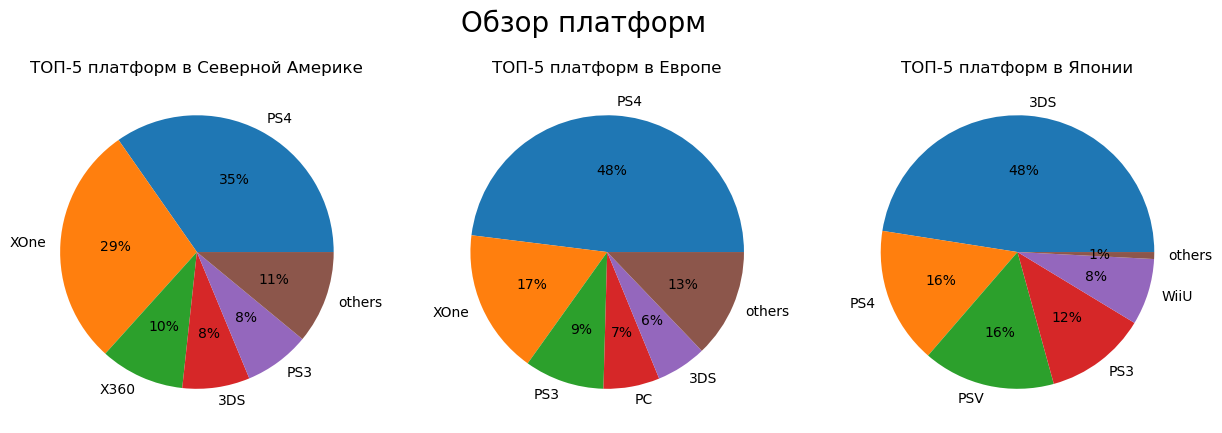

In [57]:
# Построим круговые диаграммы ТОП-5 платформ в регионах
fig4, axs4 = plt.subplots(1,3, figsize=(15, 5))
# Сформируем список регионов
regions = [('na_sales','ТОП-5 платформ в Северной Америке'),
           ('eu_sales', 'ТОП-5 платформ в Европе'),
           ('jp_sales','ТОП-5 платформ в Японии' )]
           
for i,(region, title) in enumerate(regions):
           top_platforms = actual_period.groupby('platform')[region].sum().sort_values(ascending=False)
           top_5_platforms =  top_platforms.head()
           top_5_platforms['others'] =  top_platforms[5:].sum()
           
           axs4[i].pie(top_5_platforms, labels = top_5_platforms.index,autopct='%1.0f%%')
           axs4[i].set_title(title)
           

plt.suptitle('Обзор платформ ', fontsize = 20)
plt.show()
 


Топ - 5 платформ в в Северной Америке и  Европе похожи:на 1-ом месте платформа PS4, на 2-ом XOne.
Другая ситуация в Японии : на 1-ом месте платформа 3DS, на 2-ом PS4. Также в топ- 5 попала платформа WiiU, которая не пользуется особой популярностью в Северной Америке и  Европе.


### Самые популярные жанры (топ-5) каждого региона (NA, EU, JP)

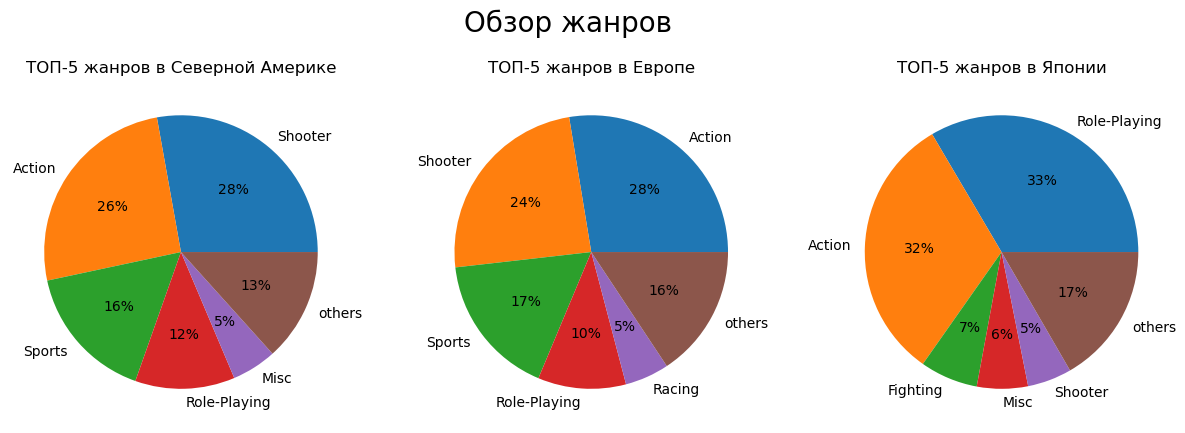

In [58]:
# Построим круговые диаграммы ТОП-5 жанров в регионах
fig4, axs4 = plt.subplots(1,3, figsize=(15, 5))
# Сформируем список регионов
regions = [('na_sales','ТОП-5 жанров в Северной Америке'),
           ('eu_sales', 'ТОП-5 жанров в Европе'),
           ('jp_sales','ТОП-5 жанров в Японии' )]
           
for i,(region, title) in enumerate(regions):
           top_genre = actual_period.groupby('genre')[region].sum().sort_values(ascending=False)
           top_5_genre =  top_genre.head()
           top_5_genre['others'] =  top_genre[5:].sum()
           
           axs4[i].pie(top_5_genre, labels = top_5_genre.index,autopct='%1.0f%%')
           axs4[i].set_title(title)
           

plt.suptitle('Обзор жанров ', fontsize = 20)
plt.show()
 


Топ - 4 жанра  в Северной Америке и  Европе совпадают:Action, Shooter, Sports и Role-playing. НА 5-ом месте в Северной Америке расположился Misc, а в Европе - Racing.
Другая ситуация в Японии : на 1-ом месте Role-playing, на 2-ом Action; Shooter, занимающий в Северной Америке и  Европе 1-ое и 2-ое место соответственно, в Японии замыкает пятерку лидеров.
Конечно, популярность определенного жанра отличается в разных регионах ввиду различий в менталитете, культуре и т.д.


### Влияет ли рейтинг ESRB на продажи в отдельном регионе

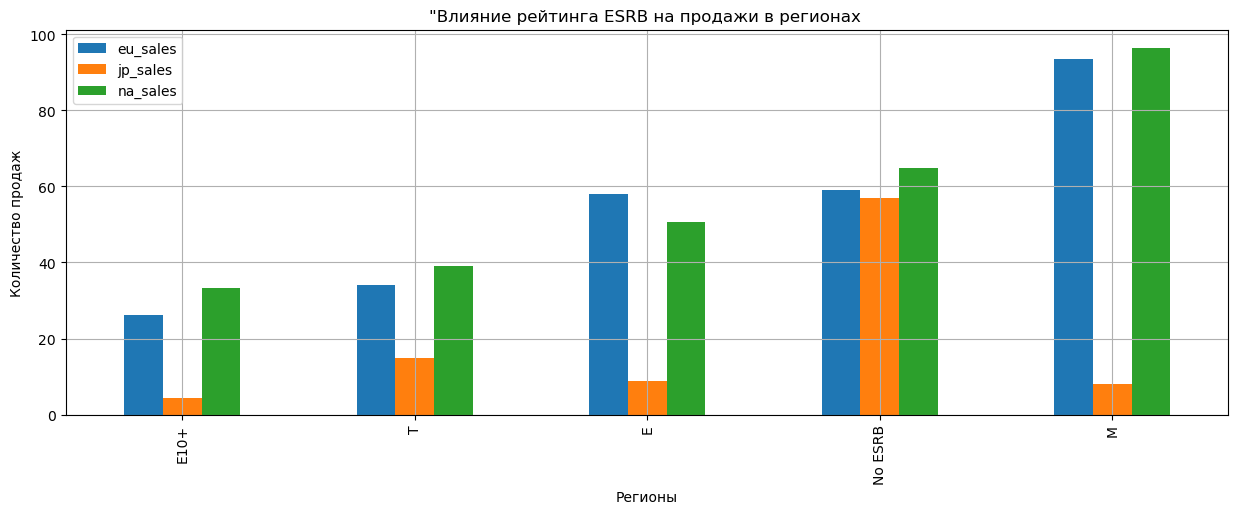

In [59]:
# Построим гистограмму влияния рейтинга ESRB на продажи в регионах
(actual_period
 .pivot_table(index='rating', values=['na_sales', 'jp_sales','eu_sales'],aggfunc='sum')
 .sort_values(by ='na_sales').head(10).plot(kind = 'bar',grid = True, figsize=(15, 5))
);
plt.title('"Влияние рейтинга ESRB на продажи в регионах ')
plt.xlabel('Регионы')
plt.ylabel('Количество продаж')

plt.show()

Расшифровка аббревиатур рейтинга ESRB:
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет.
- «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет). 
- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.


 В Северной Америке и Европе наибольшей популярностью пользуются игры с аббревиатурой рейтинга ESRB «M» («Mature») — «Для взрослых». В Японии лидируют игры без категории ('No ESRB'), так как рейтинг присваивается в США и Канаде.


**Вывод**
Согласно полученным данным можно сформировать следующие портреты пользователей кажого региона:

*Портрет американца:*
* любит играть на PS4;
* предпочитает жанр Shooter(жанр компьютерной игры основан на стрельбе и уничтожении врагов);
* чаще всего играет в игры категории «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.

*Портрет европейца:*
* любит играть на PS4;
* предпочитает жанр Action(Жанр экшена включает в себя любую игру, где игрок преодолевает трудности физическими средствами, такими как точная цель и быстрое время реакции);
* чаще всего играет в игры категории «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.

*Портрет японца:*
* любит играть на 3DS;
* предпочитает жанр Role- Playing (обширный жанр видеоигр, посвященный, как правило, поиску приключений в фантастическом сеттинге, будь то фэнтези, космоопера, постапокалипсис или что-то иное);
* чаще всего играет в игры категории без оценки Entertainment Software Rating Board (ESRB).

## Общий вывод
<div style="border: 1px solid black; padding: 20px">
    
На основании данных из открытых источников были изучены и проанализированы исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.  
    
Была проведена **предобработка данных**, в результате которой:

* Названия столбцов были приведены к нижнему регистру;
* Были изменены типы данных в столбцах year_of_release и critic_score на целочисленное значение (int64);
* Были обработаны пропуски в столбцах. По результатам обработки: 1) были удалены строки с пропусками в столбцах name и year_of_release 2) пропуски в столбцах critic_score и user_score оставлены без изменений 3) пропуски в столбце rating заменены на 'No ESRB'
* Проанализирована аббревиатура 'tbd' в столбце с оценкой пользователей. tbd заменено на NaN;
* Добавлен столбец с суммарными продажами по регионам для каждой игры.
    
В результате **исследовательского анализа данных** можно сформулировать следующие выводы:
- Количество выпусков новых игр начало увеличиваться с 1990 г и до 2008 г, на который пришелся пик. Начиная с 2009 г наблюдается спад,связанный, скорее всего, с созданием мобильных приложений. Для нашей задачи будем ориентироваться на данные с 2000 г.;
- Средний жизненный цикл платформы - около 10 лет;
- Так как мы прогнозируем данные на 2017 год, актуальный период для прогноза - предыдущие 3 года, т.е. 2014 - 2016 гг.;
- По всем платформам наблюдается уменьшение продаж в 2016 г., так как по условиям проекта данные за 2016 год неполные. Объем продаж на платформе 3DS в 2015 г. ниже, чем в 2014 г,- исключим ее из списка перспективных платформ. Таким образом, перспективные платформы:PS4, XOne;
- По диаграмме размаха («ящик с усами») наибольшее количество продаж зафиксировано на платформе WiiU. Однако, если мы посмотрим на график  с продажами по годам, то увидим, что на платформе наблюдается снижение количества продаж, начиная с 2015 года. Очевидно, что жизненный цикл платформы идет на убыль. Далее по количеству продаж лидируют платформы PS4, XOne, которые ранее мы отнесли к перспективным. Медиана продаж по всем платформам не превышает 0,2 млн.шт.;
- Вычисление коэффициента Пирсона дало следующие результаты:
между продажами и отзывами критиков имеется слабая связь, а между продажами и отзывами пользователей корреляция отсутствует;
- Топ - 3 жанров по количеству игр: Action, Role-Playing и Adventure. Жанры с наименьшим количеством игр (менее 50): Simulation, Platform , Strategy и Puzzle;
- Топ - 3 жанров по количеству продаж: Action, Shooter и Sports;
- Анализ по медианному значению и среднему дал несколько другие результаты:

Жанры с наибольшим медианным значением и средним: Shooter и Sports;
Action, который был в лидерах по количеству игр и количеству продаж характеризуется низкой медианой и средним значением;
Fighting и Platform, имеющие мало игр, показывают хорошие медианные продажи;
Жанр Adventure, который замыкал топ- 3 по количеству игр, имеет самые низкие медианные продажи.    
    
    
Можно сформировать следующие **портреты пользователей** кажого региона:

*Портрет американца:*
* любит играть на PS4;
* предпочитает жанр Shooter(жанр компьютерной игры основан на стрельбе и уничтожении врагов);
* чаще всего играет в игры категории «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.

*Портрет европейца:*
* любит играть на PS4;
* предпочитает жанр Action(Жанр экшена включает в себя любую игру, где игрок преодолевает трудности физическими средствами, такими как точная цель и быстрое время реакции);
* чаще всего играет в игры категории «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.

*Портрет японца:*
* любит играть на 3DS;
* предпочитает жанр Role- Playing (обширный жанр видеоигр, посвященный, как правило, поиску приключений в фантастическом сеттинге, будь то фэнтези, космоопера, постапокалипсис или что-то иное);
* чаще всего играет в игры категории без оценки Entertainment Software Rating Board (ESRB).
    
</div>    